In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Display first few rows of the dataset
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [44]:
# Preprocessing

# Remove ID column
df_cleaned = df.drop(columns=['ID#'])

# Handle outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [37]:
# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)
print(df_scaled)

[[-0.52286898 -0.15884669 -0.75576905 ... -0.43208177  1.43130315
  -0.71838371]
 [-0.6662006  -0.15884669 -0.75576905 ... -0.43208177  1.41571245
  -0.71838371]
 [-0.31008621 -0.15884669 -0.75576905 ... -0.43208177  1.44786827
  -0.71838371]
 ...
 [ 0.2092352  -0.15884669  0.75994341 ... -0.43208177 -1.29609509
   1.39201374]
 [-0.09192386 -0.15884669 -0.75576905 ...  0.11782672 -1.2965823
  -0.71838371]
 [-0.92757664 -0.15884669 -0.75576905 ... -0.43208177 -1.29804393
  -0.71838371]]


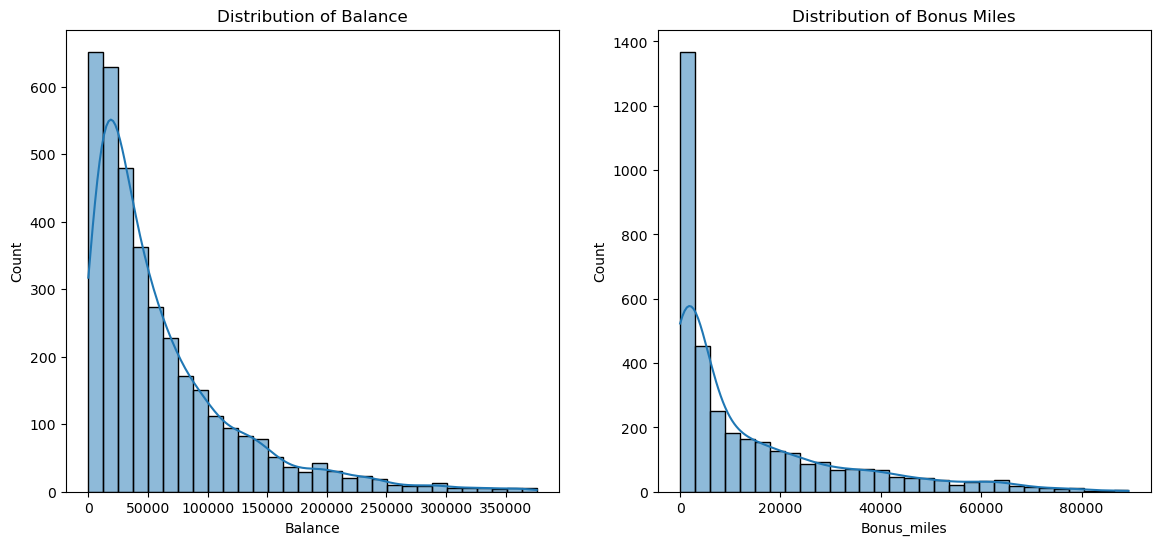

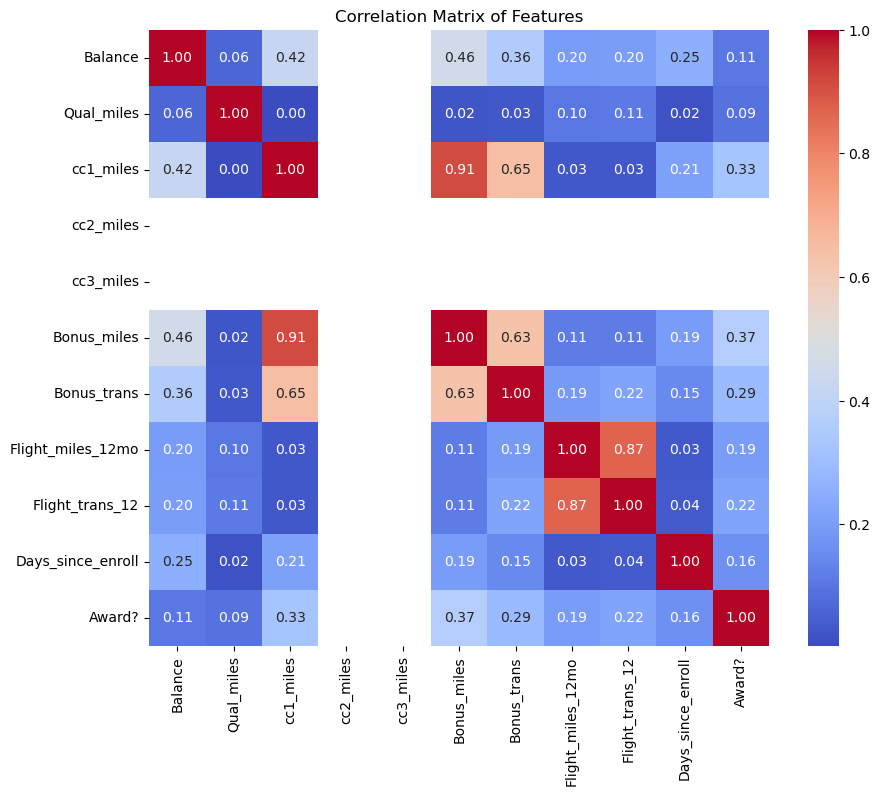

In [45]:
# Exploratory Data Analysis (EDA)

# Plot distributions of key features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers['Balance'], kde=True, bins=30)
plt.title('Distribution of Balance')

plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['Bonus_miles'], kde=True, bins=30)
plt.title('Distribution of Bonus Miles')

plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

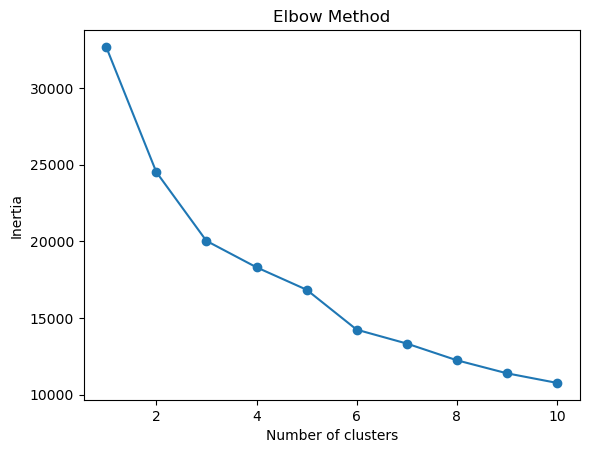

[ 0  0  0 ... -1 17  0]


In [48]:

# Implementing Clustering Algorithms

# K-Means Clustering
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
print(dbscan_labels)


In [18]:
# Cluster Analysis and Interpretation

# K-Means Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')


K-Means Silhouette Score: 0.23588355459058075


In [19]:
# Hierarchical Clustering Silhouette Score
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')

Hierarchical Clustering Silhouette Score: 0.2971485683326107


In [20]:
# DBSCAN Silhouette Score (ignoring noise points labeled as -1)
dbscan_silhouette = silhouette_score(df_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

DBSCAN Silhouette Score: -0.1316951029150738


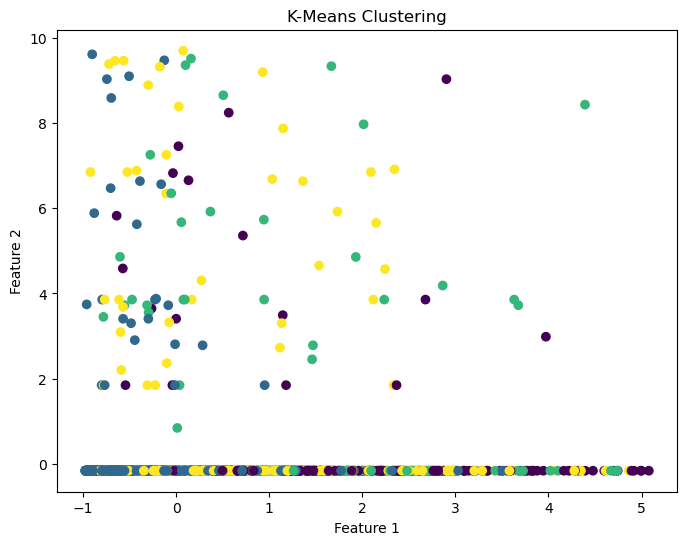

In [ ]:
# Visualization of Clustering Results

# K-Means Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Hierarchical Dendrogram
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# DBSCAN Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()